# Getting Data Assignment : Web Scrapping

In [2]:
# Here, we are importing all the usable package in this assignment

import pandas as pd
import numpy as np
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
from astropy.table import Table
from datetime import datetime
import requests
import urllib
import re
import json

# Question 1 :- Scrape the article posted to TechCrunch.com & present the  articles on the front page in a table with article title, publish date, author, tags.

In [6]:
# Inserting code to pull the data out of Techcrunch website.
urls = "https://techcrunch.com/"
r = requests.get(urls)
soup = BeautifulSoup(r.content, "lxml")

# Here, in "Content", we are inserting the code to find the Author, Datetime, Title.
# Here, in "Content1", we are inserting the code to find the Tags.
content=soup.find_all("div", {"class":"block-content"})
content1=soup.find_all("div", {"class":"tags"})

# Here, we are inserting the code to create a table.
df_result = pd.DataFrame()

# Inserting code to apply "for loop" which will fetch all the titles, authors, datetime & Tags. 
for i, j in zip(range(4, (len(content)), 1), range(0,(len(content1)+1), 1)):
        titles = content[i]
        tag1 = content1[j]
 
        #Inserting code to fetch the values of title, datetime, author,tag individually.
        All_Titles=titles.h2.text 
        
        Date_Time=titles.time["datetime"]  
        d = datetime.strptime(Date_Time, '%Y-%m-%d %H:%M:%S')
        Date = d.strftime('%Y-%m-%d')    # Converting Datetime into Date as required in question "Publish Date". 
        
        Author=titles.div.a.text      
        Tag=tag1.text.strip()
        
        #Inserting code to fetch the values of title, datetime, author,tag together.
        sales = {'Article Title': All_Titles,
                 'Publish Date': Date,
                 'Author': Author,
                 'Tags':Tag}
        
        # Here, we are inserting code to store all the values coming in sales(title,datetime,author,tag) by appending it.
        df_result = df_result.append(sales,ignore_index=True)

# Inserting code to start the index from 1 instead of 0.
df_result.index += 1 

# Inserting code to increase the width of title so that everything will be visible.
df_result.style.set_properties(subset=['Article Title'], **{'width': '500px'})



,Article Title,Author,Publish Date,Tags
1,The HOLD 10 Index is a passively managed fund of the top 10 cryptocurrencies,Fitz Tepper,2017-10-16,
2,North Korea reportedly hacked UK’s Channel 4 over ‘slanderous’ TV series,Jon Russell,2017-10-16,Collaborative Consumption
3,Here’s what you can do to protect yourself from the KRACK WiFi vulnerability,Natasha Lomas,2017-10-16,Fundings & Exits
4,Spanish bank launches money-transfer app focused initially on US-Mexico remittances,Sarah Perez,2017-10-16,Earnings
5,Terminal makes it easy for companies to open international offices,John Mannes,2017-10-16,Finance
6,Samsung’s new connected tags monitor pets or kids for a week on a single charge,Jon Russell,2017-10-16,Privacy
7,Astro’s Luna Display will turn your iPad’s front camera into a clever button,Darrell Etherington,2017-10-16,Apps
8,Substack helps writers turn blogs and newsletters into subscription businesses,Anthony Ha,2017-10-16,Developer
9,eBay takes on The RealReal and other fashion resellers with launch of authentication program,Sarah Perez,2017-10-16,Asia
10,Sorry SNES Classic: Analogue’s Super Nt is the ultimate Super Nintendo,Darrell Etherington,2017-10-16,Gadgets


# Question 2 :-  Scrape  https://www.data.gov to identify the number of data sets available.

In [5]:
# Inserting code to pull the data out of Data.gov website.
urls = "https://www.data.gov/"
r = requests.get(urls).text
soup = BeautifulSoup(r, 'html5lib')

# Here, in "Content", we are inserting the code to find the datasets.
content=soup.find_all("label", {"for":"search-header"})
data=content[0]

#Inserting code to fetch the numeric value of Datasets.
data_sets=data.a.text

# Inserting code to Print it.
print("Number of DataSets available: " + data_sets)

Number of DataSets available: 197,291 datasets


# Question 3 :- Identify the number of U.S. Senate votes rejected by a margin of less than 5 votes.  Also, provide list of which votes match this criteria.  

In [4]:
# Inserting code to pull the data out of senate.gov website.
urls = "https://www.senate.gov/legislative/LIS/roll_call_lists/vote_menu_115_1.htm"
r = requests.get(urls).text
soup = BeautifulSoup(r, 'html5lib')


# Here, in "Content", we are inserting the code to find the description and votes..
content = soup.find_all("td", class_="contenttext") 


# Here, we are inserting the code to create a table.
df_result1 = pd.DataFrame()

count=0

# Inserting code to apply "for loop" to count number of votes within a margin of 5 & to show the list. 
for i in range(1,(len(content)-1),5):
    title=content[i].text#1,6,11
    if title == 'Rejected':
        titles=content[i-1].text#1,6,11
        titles1=content[i+1].text #listssssss
        numbers=re.findall('\d+', titles)
        s=int(numbers[2])-int(numbers[1])
        
        # Inserting code with "abs" (in if condition) to get the absolute value of 5, as we require the diff within 5.
        if 0<=abs(s)<5:
            
            # Inserting code to count the values within a margin of 5
            count=count+1 
            
            #Inserting code to fetch the Description, Difference, with list of votes(voting number, yeas, nays).
            sale1 = {'Description': titles1,
                     'Difference': s,
                     'Vote number': numbers[0],
                     'YEAs': numbers[1],
                     'NAYs': numbers[2]}
            
            # Here, we are inserting code to store all the values coming in sales1(Description, Difference) by appending it.
            df_result1 = df_result1.append(sale1,ignore_index=True)

            
# Inserting code to find the number of U.S. Senate votes rejected by a margin of less than 5 votes
print("Number of U.S. Senate votes in the 115th Congress that were rejected by a margin of less than 5 votes:" + str(count))  


# Inserting code to start the index from 1 instead of 0.
df_result1.index += 1 


# Inserting code to increase the width of the description in the output.
df_result1.style.set_properties(subset=['Description'], **{'width': '500px'})  



Number of U.S. Senate votes in the 115th Congress that were rejected by a margin of less than 5 votes:29


,Description,Difference,NAYs,Vote number,YEAs
1,On the Amendment S.Amdt. 667: McConnell Amdt. No. 667; Of a perfecting nature.,2,51,179,49
2,"On the Motion: Murray Motion to Commit H.R. 1628 to the Committee on Health, Education, Labor and Pensions, with Instructions; A bill to provide for reconciliation pursuant to title II of the concurrent resolution on the budget for fiscal year 2017.",4,52,178,48
3,On the Motion S.Amdt. 389: Motion to Waive All Applicable Budgetary Discipline Re: Strange Amdt. No. 389; To provide for premium assistance for low-income individuals.,0,50,174,50
4,On the Motion: Casey Motion to Commit H.R. 1628 with Instructions; A bill to provide for reconciliation pursuant to title II of the concurrent resolution on the budget for fiscal year 2017.,3,51,171,48
5,On the Motion: Donnelly Motion to Commit H.R. 1628 with Instructions; A bill to provide for reconciliation pursuant to title II of the concurrent resolution on the budget for fiscal year 2017.,4,52,170,48
6,"On the Motion to Proceed: Motion to Proceed to H. J. Res. 36; A joint resolution providing for congressional disapproval under chapter 8 of title 5, United States Code, of the final rule of the Bureau of Land Management relating to ""Waste Prevention, Production Subject to Royalties, and Resource Conservation"".",2,51,125,49
7,On the Motion to Adjourn: Schumer Motion to Adjourn Until 5:00 P.M.,4,52,108,48
8,"On the Motion to Postpone: Motion to Postpone the Motion to Invoke Cloture, Upon Reconsideration, of the Nomination of Neil M. Gorsuch Until a Time Certain",4,52,107,48
9,On the Motion: Motion to Extend Debate Re: Pruitt Nomination,4,51,70,47
10,"On the Motion S.Amdt. 86: Motion to Waive the C.B.A. Re: Brown Amdt. No. 86; To create a point of order against legislation that would undermine the historic coverage gains the United States has made in children's health, which have resulted in the lowest uninsured rate for children in the Nation's history.",0,49,25,49


# Question 4 :- Give the number of alerts and warnings for international travel given by the US government. 

In [10]:
# Here, we are pulling data out of travel.state.gov website.
urls = "https://travel.state.gov/content/passports/en/alertswarnings.html"
r = requests.get(urls).text
soup = BeautifulSoup(r, 'html5lib')


# Here, in "Content", inserting the code to find the all the warnings.
content = soup.find_all("td", class_="warning")


# Here, in "Content1", inserting the code to find the all the alert.
content1 = soup.find_all("td", class_="alert")


# Inserting code to print out both number of warning & alerts clearly.
print("Number of Warnings for international travel: " + str(len(content)))
print("Number of Alerts for international travel: " + str(len(content1)))

Number of Warnings for international travel: 42
Number of Alerts for international travel: 3


# Question 5 :- Total number of female babies whose names start with 'K'. 

In [11]:
# Inserting code here to scrap the site
urls = "https://www.ssa.gov/OACT/babynames/decades/names2010s.html"
r = requests.get(urls).text
soup = BeautifulSoup(r, 'html5lib')


# Inserting code here to find total number of males,females & their names
content = soup.find_all("td")
Total_number=[]


# For loop, to get all the females with name 'k'
# Here, we are giving this range because female names are starting from 6 and every second female name is 
# coming after the difference of 6. 

for i in range(6,len(content),5): 
    titles=content[i]
    Female_Name=titles.text              # Code to get the text of female names
    if Female_Name[0] == 'K':            # Condition to check whether the female names are starting from 'k' or not
        titles=content[i+1]              # code to get how many people has that name
        count=titles.text                # storing the total number of people with that name
        number=count.replace(',','')     # replacing the commas in between the number
        Total_number.append(int(number)) # storing all values here

        
#Inserting code to print the final value after summing all the values in the list "Total_number" 
print("Total number of female babies whose names start with 'K': " + str(sum(Total_number)))


Total number of female babies whose names start with 'K': 276214


# Question 6 :- Missing Data

# Are any of the songs not available in Spotify?

# For the set of songs create a scatterplot for of energy vs. valence. 

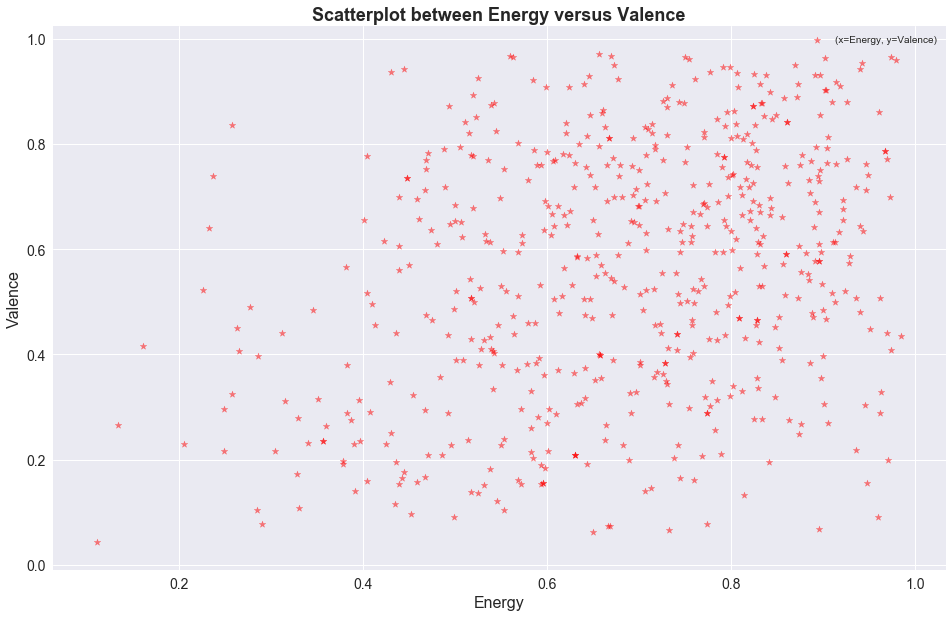

In [9]:
# Here, we are importing few other packages required for this question.
import spotipy
import sys
import spotipy.util as util
from astropy.io import ascii
import seaborn as sns
sns.set()


# We're going to make this plot taller so we can see the data better
plt.figure(figsize=(16, 10)) 


# Inserting code here to remove plot frame lines. Use the spines function
ax = plt.subplot(111)
ax.spines["top"].set_visible(False)      #This is to remove the top frame line of plot.
ax.spines["bottom"].set_visible(False)   #This is to remove the bottom frame line of plot.
ax.spines["left"].set_visible(False)     #This is to remove the left frame line of plot.
ax.spines["right"].set_visible(False)    #This is to remove the right frame line of plot.


# Inserting code here to only show the tick marks on the left and bottom
ax.get_xaxis().tick_bottom();            #This is to only show the bottom tick mark.
ax.get_yaxis().tick_left();              #This is to only show the left tick mark.


# Inserting code here to make the fontsize bigger
plt.yticks(fontsize=14)    
plt.xticks(fontsize=14)


# Inserting code here to create xlabel & ylabel, and make the size bigger
plt.ylabel('Valence', fontsize=16)
plt.xlabel('Energy', fontsize=16) 


# Here, we are reading the CSV file(consist of set of songs)
data = ascii.read("song-list.csv")  
Artists=data['Artist']
Songname=data['Title']


# Inserting code for authorisation
scope = 'user-library-read'
token = util.prompt_for_user_token("pjoshi3",scope,client_id='3df26298e5ce4b969fa1282a2cb3965e',
                                                   client_secret='add8a85b252945b48817511be0f00efc',
                                                   redirect_uri='https://www.google.com/')
spotify = spotipy.Spotify(token)


# Here, we made a blank list of track,energy,valence for further storing of data 
Track=[]
Energy=[]
Valence=[]


# For loop, to get the values of Energy & Valence
for i in range(0, len(Songname)):
    
    
    #Inserting code to check the song in spotify & then to get the id of every song
    results = spotify.search(q='track:' + Songname[i], type='track')
    items = results['tracks']['items']
    if items != []:
        A=items[0]
        Track.append(Songname[i])
        uri=A['id']
        
        
        #Inserting code to get the features on the basis of each track id coming in "uri"
        Track1 = spotify.audio_features(tracks=uri)
        if Track1 != [None]:
            p=Track1[0]
            Energy.append(p['energy'])    # storing Energy of each track here
            Valence.append(p['valence'])  # storing Valence of each track here

            
#Inserting code to get the Scatter plo
plt.scatter(Energy,Valence,label='(x=Energy, y=Valence)',color='r',marker='*', alpha=0.5)


# Inserting code to make the title of the plot
plt.title("Scatterplot between Energy versus Valence", 
          fontsize=18, fontweight='bold')

plt.legend()
plt.show()  

# Yes there are 2 missing data's.

In [7]:
# for loop to check the missing songs
for i in range(0, len(Songname)):
    results = spotify.search(q='track:' + Songname[i], type='track')
    items = results['tracks']['items']
    
    # Inserting code to print the missing song names.
    if items == []:
        print("Missing Song: " + Songname[i])

Missing Song: Auld Lang Syne (The Millenium Mix)
Missing Song: Kryptonite (I'm On It)
